# Final Project
## Network Science HS19
### Imports

In [1]:
import geopandas as gpd
import fiona
import networkx as nx
import matplotlib.pyplot as plt

### Load the data

In [2]:
#create a list of layers with in a file geodatabase 
layerlist = fiona.listlayers('./Schienennetz_LV03_20171210.gdb')
#print(layerlist)
netzknoten = gpd.read_file('./Schienennetz_LV03_20171210.gdb',layer='Netzknoten')
display(netzknoten.head())
netzsegment = gpd.read_file('./Schienennetz_LV03_20171210.gdb',layer='Netzsegment')
display(netzsegment.head())

,xtf_id,Betriebspunkt_Nummer,Betriebspunkt_Name,Betriebspunkt_Abkuerzung,Betriebspunkt_DatenherrAbkuer,BeginnGueltigkeit,EndeGueltigkeit,BearbeitungsDatum,Stand,rUebergeordnet,geometry
0,ch14uvag00092584,8580567,"Wabern, Eichholz",None,None,2014-10-01T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,None,POINT (600987.8999999985 197507.6000999995)
1,ch14uvag00092599,8590023,"Bern, Sandrain",None,None,2014-10-01T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,None,POINT (600494.6999999993 197843.5001000017)
2,ch14uvag00092576,8588779,"Basel, Rheingasse",None,None,2014-10-01T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,None,POINT (611516.0089999996 267823.2399999984)
3,ch14uvag00092992,8594239,"Zürich, Schiffbau",None,None,2014-10-01T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,None,POINT (681630.9569999985 249128.061999999)
4,ch14uvag00092591,8590020,"Bern, Kursaal",None,None,2014-10-01T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,None,POINT (600835.9160000011 200203.6629999988)


,xtf_id,Name,KmAnfang,KmEnde,Infrastrukturbetr_TUNummer,Infrastrukturbetr_TUAbkuerzung,AnzahlStreckengleise,Spurweite,Elektrifizierung,BeginnGueltigkeit,EndeGueltigkeit,BearbeitungsDatum,Stand,rAnfangsknoten,rEndknoten,rKmLinie,SHAPE_Length,geometry
0,ch14uvag00220884,8589351_8589303,1.185,1.510,303,BVB,2,mm1000,Gleichstrom,2017-12-10T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,ch14uvag00092887,ch14uvag00092837,ch14uvag00090320,325.030914,(LINESTRING (610431.368999999 267713.043999999...
1,ch14uvag00088467,TLH_OSS,11.838,19.472,1,SBB CFF FFS,1,mm1435,Wechselstrom_16_7Hz,2014-09-03T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,ch14uvag00090017,ch14uvag00089678,ch14uvag00086923,7633.463127,(LINESTRING (699241.3559999987 269603.87999999...
2,ch14uvag00095746,8590881_8587655,2.514,3.123,560,VBG,2,mm1000,Gleichstrom,2014-11-10T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,ch14uvag00092984,ch14uvag00092985,ch14uvag00090371,608.838025,(LINESTRING (686482.8900000006 252035.76300000...
3,ch14uvag00220957,8591177_8599994,0.000,0.482,346,VBZ,1,mm1000,Gleichstrom,2017-12-10T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,ch14uvag00092803,ch14uvag00220965,ch14uvag00220961,481.561851,(LINESTRING (681272.495000001 248498.306000001...
4,ch14uvag00220958,8599995_8599994,0.000,0.190,346,VBZ,2,mm1000,Gleichstrom,2017-12-10T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,ch14uvag00220968,ch14uvag00220965,ch14uvag00220960,189.914409,(LINESTRING (681584.2729999982 249057.48999999...


### Create the network graph

In [3]:
G = nx.Graph()
for index, row in netzknoten.iterrows():
    G.add_node(row.xtf_id)
    
for index, row in netzsegment.iterrows():
    G.add_edge(row.rAnfangsknoten, row.rEndknoten)


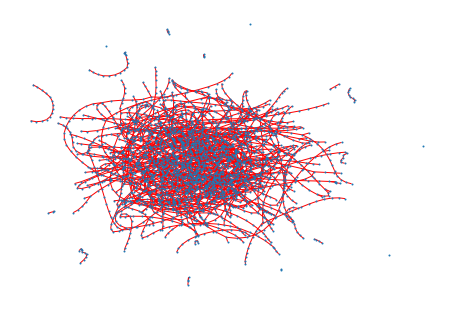

In [4]:
nx.draw(G, node_size=1, edge_color="r")

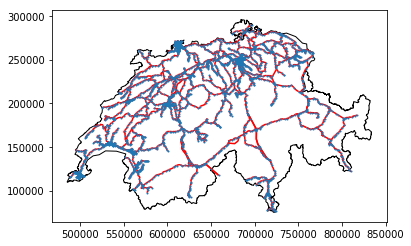

In [23]:
# Load map
map = gpd.read_file('./Maps/swissBOUNDARIES3D_1_3_TLM_LANDESGEBIET.shx')

# Create plot
fig, ax = plt.subplots()
ax.set_aspect('equal')

map.plot(ax=ax, color='w', edgecolor='black', zorder=0)
netzsegment.plot(ax=ax, color='r', zorder=100)
netzknoten.plot(ax=ax, marker='o', markersize=1, zorder=200)

plt.show()